In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import category_encoders as ce


hotels = pd.read_csv('hotels.csv')
hotels.head(5)

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng
0,Stratton Street Mayfair Westminster Borough Lo...,581,2/19/2016,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,4,7,10.0,"[' Leisure trip ', ' Couple ', ' Studio Suite ...",531 day,51.507894,-0.143671
1,130 134 Southampton Row Camden London WC1B 5AF...,299,1/12/2017,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,2,14,6.3,"[' Business trip ', ' Couple ', ' Standard Dou...",203 day,51.521009,-0.123097
2,151 bis Rue de Rennes 6th arr 75006 Paris France,32,10/18/2016,8.9,Legend Saint Germain by Elegancia,China,No kettle in room,6,406,No Positive,0,14,7.5,"[' Leisure trip ', ' Solo traveler ', ' Modern...",289 day,48.845377,2.325643
3,216 Avenue Jean Jaures 19th arr 75019 Paris Fr...,34,9/22/2015,7.5,Mercure Paris 19 Philharmonie La Villette,United Kingdom,No Negative,0,607,Friendly staff quiet comfortable room spotles...,11,8,10.0,"[' Leisure trip ', ' Solo traveler ', ' Standa...",681 day,48.888697,2.394540
4,Molenwerf 1 1014 AG Amsterdam Netherlands,914,3/5/2016,8.5,Golden Tulip Amsterdam West,Poland,Torn sheets,4,7586,The staff was very friendly and helpful Break...,20,10,9.6,"[' Business trip ', ' Couple ', ' Standard Dou...",516 day,52.385601,4.847060


In [2]:
hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               386803 non-null  object 
 1   additional_number_of_scoring                386803 non-null  int64  
 2   review_date                                 386803 non-null  object 
 3   average_score                               386803 non-null  float64
 4   hotel_name                                  386803 non-null  object 
 5   reviewer_nationality                        386803 non-null  object 
 6   negative_review                             386803 non-null  object 
 7   review_total_negative_word_counts           386803 non-null  int64  
 8   total_number_of_reviews                     386803 non-null  int64  
 9   positive_review                             386803 non-null  object 
 

In [3]:
#заполняем пропуски самым простым способом
hotels = hotels.fillna(0)

In [4]:
# Разбиваем датафрейм на части, необходимые для обучения и тестирования модели  
# Х - данные с информацией об отелях, у - целевая переменная (рейтинги отелей)  
X = hotels.drop(['reviewer_score'], axis = 1)  
y = hotels['reviewer_score']

In [5]:
# Загружаем специальный инструмент для разбивки:  
from sklearn.model_selection import train_test_split  

In [6]:
# Наборы данных с меткой "train" будут использоваться для обучения модели, "test" - для тестирования.  
# Для тестирования мы будем использовать 25% от исходного датасета.  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [7]:
# непрерывные признаки
num_cols = ['total_number_of_reviews', 'review_total_negative_word_counts', 'review_total_positive_word_counts',
            'total_number_of_reviews_reviewer_has_given']

# категориальные признаки
cat_cols = ['average_score', 'lat']

<AxesSubplot: >

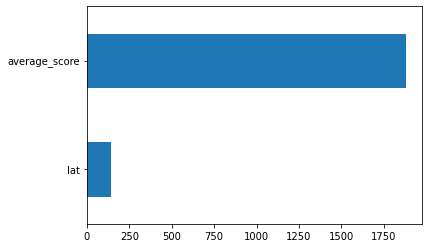

In [8]:
y=y.astype('int')

...
from sklearn.feature_selection import chi2 # хи-квадрат

imp_cat = pd.Series(chi2(X[cat_cols], y)[0], index=cat_cols)
imp_cat.sort_values(inplace = True)
imp_cat.plot(kind = 'barh')

<AxesSubplot: >

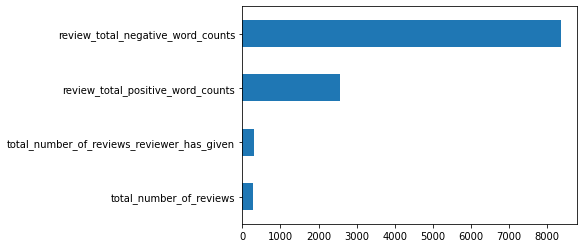

In [9]:
from sklearn.feature_selection import f_classif # anova

imp_num = pd.Series(f_classif(X[num_cols], y)[0], index = num_cols)
imp_num.sort_values(inplace = True)
imp_num.plot(kind = 'barh')

In [10]:
hotels['hotel_name'].nunique()

1492

In [11]:
hotels['review_date'] = pd.to_datetime(hotels['review_date'])
hotels['review_date']


0        2016-02-19
1        2017-01-12
2        2016-10-18
3        2015-09-22
4        2016-03-05
            ...    
386798   2017-04-19
386799   2017-02-13
386800   2016-02-07
386801   2017-05-21
386802   2016-08-05
Name: review_date, Length: 386803, dtype: datetime64[ns]

In [12]:
def get_experience(arg):
    month_key_words = ['day', 'days']
    args_splited = arg.split(' ')
    month = 0
    for i in range(len(args_splited)):
        if args_splited[i] in month_key_words:
            month = args_splited[i-1]
    
        
    return  int(month)
y = hotels['days_since_review'].apply(get_experience)



import datetime


x = pd.to_datetime(hotels['review_date']+hotels['days_since_review_int'])
df['Date_2'] = hotels['review_date'] + datetime.timedelta(days=hotels['days_since_review_int'])
hotels['review_date'] = hotels['review_date'].dt.day + hotels['days_since_review_int']

hotels['days_since_review_int'] = pd.to_datetime(hotels['days_since_review_int'])
hotels['years_diff '] = (pd.to_datetime('2015-08-04') + hotels['days_since_review_int']).dt.seconds
hotels['years_diff '].max()

print(x)

In [13]:
hotels['tags']

0         [' Leisure trip ', ' Couple ', ' Studio Suite ...
1         [' Business trip ', ' Couple ', ' Standard Dou...
2         [' Leisure trip ', ' Solo traveler ', ' Modern...
3         [' Leisure trip ', ' Solo traveler ', ' Standa...
4         [' Business trip ', ' Couple ', ' Standard Dou...
                                ...                        
386798    [' Leisure trip ', ' Group ', ' Club Double or...
386799    [' Leisure trip ', ' Couple ', ' Standard Doub...
386800    [' Business trip ', ' Solo traveler ', ' Singl...
386801    [' Leisure trip ', ' Solo traveler ', ' Deluxe...
386802    [' Leisure trip ', ' Couple ', ' Bunk Bed Room...
Name: tags, Length: 386803, dtype: object

In [14]:
def rev_func(num_tags):
    num_tags = num_tags[2:-2]
    res = num_tags.strip().split(' \', \' ')
    return res

hotels['tags_n'] = hotels['tags'].apply(rev_func)
hotels = hotels.explode('tags_n')
len(hotels['tags_n'].unique())


2368

In [15]:
x = hotels.groupby('tags')['total_number_of_reviews'].max().sort_values(ascending=False)


<AxesSubplot: >

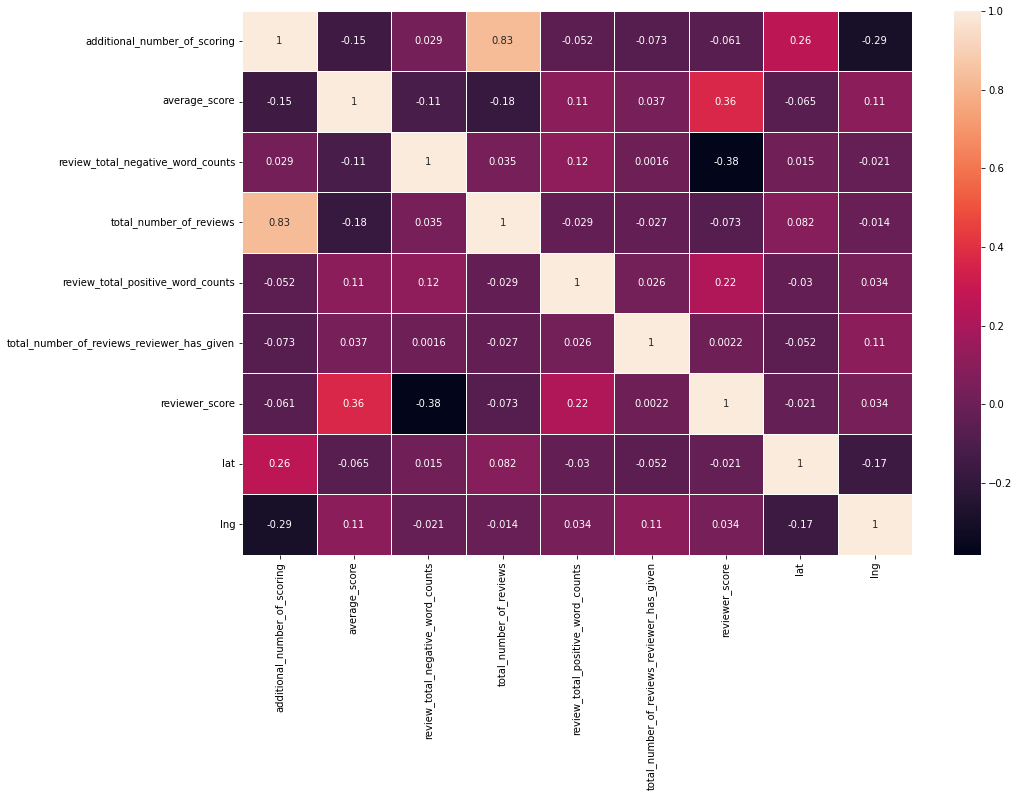

In [16]:

import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(hotels.corr(), annot=True, linewidths=.5, ax=ax)

from pandas_profiling import ProfileReport
profile = ProfileReport(hotels, title="hhhh")

hotels["reviewer_nationality"].value_counts(normalize=True)

In [20]:

bin_encoder = ce.BinaryEncoder(hotels['reviewer_nationality'])
country_bin = bin_encoder.fit_transform(hotels['reviewer_nationality'])
data = pd.concat([hotels, country_bin], axis=1)



In [ ]:
clothing_dummies = pd.get_dummies(hotels, columns=['type'])

In [18]:
hotels['more_review_year'] = hotels['review_date'].dt.year
hotels['more_review_year']

0         2016
0         2016
0         2016
0         2016
0         2016
          ... 
386801    2017
386802    2016
386802    2016
386802    2016
386802    2016
Name: more_review_year, Length: 1767522, dtype: int64

In [27]:
addresses = pd.Series(hotels['hotel_address'].unique())
print(addresses)


0       Stratton Street Mayfair Westminster Borough Lo...
1       130 134 Southampton Row Camden London WC1B 5AF...
2        151 bis Rue de Rennes 6th arr 75006 Paris France
3       216 Avenue Jean Jaures 19th arr 75019 Paris Fr...
4               Molenwerf 1 1014 AG Amsterdam Netherlands
                              ...                        
1488      Viriotgasse 5 09 Alsergrund 1090 Vienna Austria
1489             8 rue d Anjou 8th arr 75008 Paris France
1490    Prinsengracht 717 Amsterdam City Center 1017 J...
1491    43 Rue De l Abb Gr goire 6th arr 75006 Paris F...
1492    Johann Staud Stra e 32 16 Ottakring 1160 Vienn...
Length: 1493, dtype: object


In [19]:
cols_to_exclude = ["Date","Rooms","Bedroom","Bathroom","Car"]
max_uniq_count = 150
for col in melb_df.columns:
    if melb_df[col].nunique() < max_uniq_count and col not in cols_to_exclude:
        melb_df[col] = melb_df[col].astype("category")
display(melb_df.info())

NameError: name 'melb_df' is not defined

In [ ]:

hotels['more_review_year'] = pd.to_datetime(hotels['more_review_year'])
quartets = hotels['more_review_year'].dt.quarter
print(quartets.value_counts().iloc[1])

IndexError: single positional indexer is out-of-bounds

In [ ]:
ord_encoder = ce.OrdinalEncoder()
data_bin = ord_encoder.fit_transform(hotels[['lng']])
clothing = pd.concat([hotels, data_bin], axis=1)

clothing

NameError: name 'ce' is not defined